

*   Name:- Manthan Ayalwar
*   UID :- 2021700003
*   Batch :- I (Cse-ds)






**AIM:** Create basic charts using Tableau / Power BI / R / Python / D3.js to be performed on the dataset of Ecommerce field


Complete all plots on practice dataset and reproduce on e-commerce dataset.

Basic - Bar chart, Pie chart, Histogram, Timeline chart, Scatter plot, Bubble plot

Calculate Product wise sales, region wise sales

Write observations from each chart.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/data.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataset
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [ ]:
# Remove missing values if any
df.dropna(inplace=True)

# Convert 'InvoiceDate' to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Add a column for 'TotalSales'
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Display the cleaned data
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   TotalSales   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB
None


**Bar Chart**


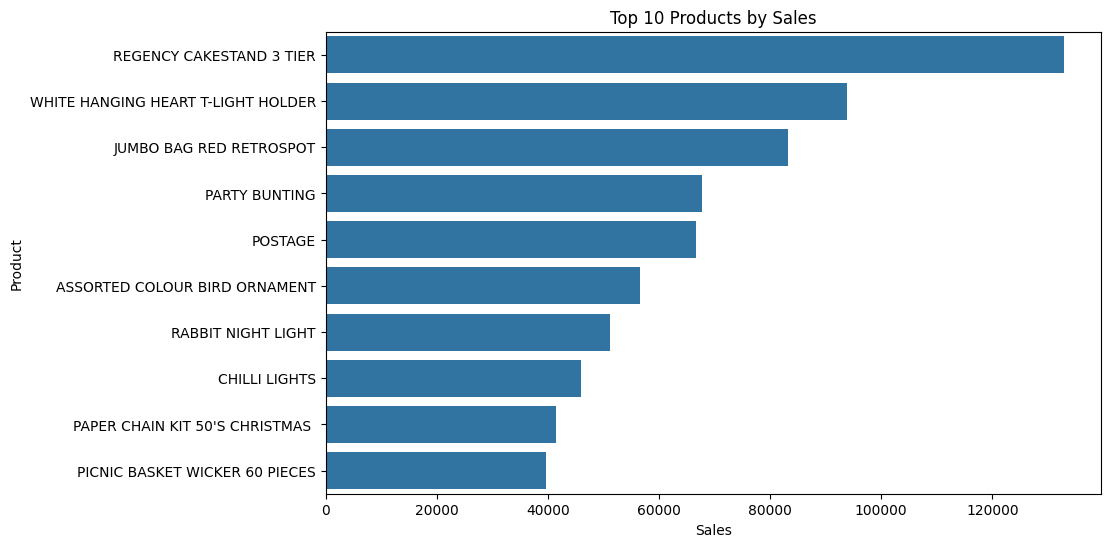

In [ ]:
# Group by 'Description' to calculate product-wise sales
product_sales = df.groupby('Description')['TotalSales'].sum().reset_index()

# Sort by sales
product_sales = product_sales.sort_values(by='TotalSales', ascending=False)

# Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalSales', y='Description', data=product_sales.head(10))
plt.title('Top 10 Products by Sales')
plt.xlabel('Sales')
plt.ylabel('Product')
plt.show()



*   Product Rankings: The product with the highest sales is "REGENCY CAKESTAND 3 TIER," followed by "WHITE HANGING HEART T-LIGHT HOLDER" and "JUMBO BAG RED RETROSPOT."
*   Sales Distribution: The sales distribution is relatively skewed, with a significant gap between the top-selling products and the rest of the list. This suggests that a few products are driving a large portion of the overall sales.
Product Diversity: The top 10 products span various categories, including home decor, party supplies, and novelty items. This indicates that the business has a diverse product portfolio.
*   Sales Growth: While the chart does not explicitly show sales growth, it can be inferred that the products at the top of the list have experienced higher sales compared to those at the bottom.
*   Product Performance: Products like "PICNIC BASKET WICKER 60 PIECES" and "PAPER CHAIN KIT 50'S CHRISTMAS" appear to have lower sales compared to the other products on the list. This could be due to factors such as pricing, demand, or marketing efforts.





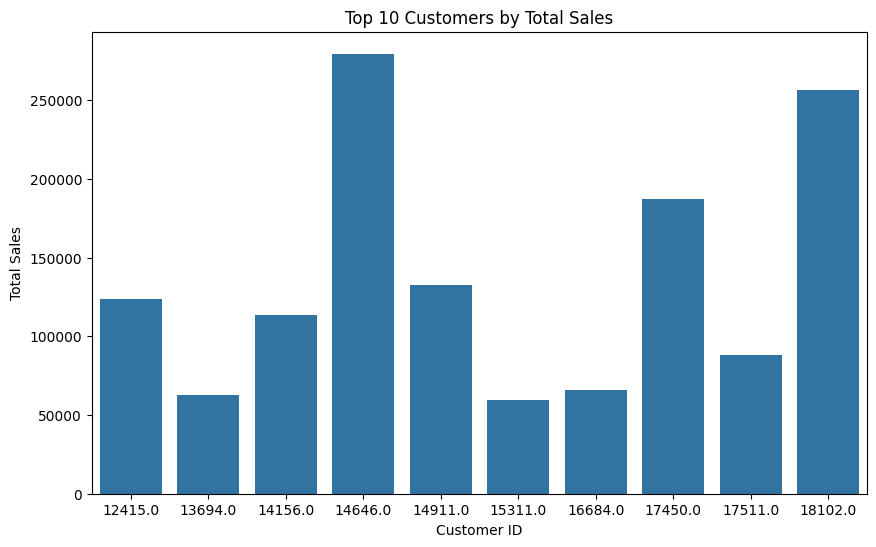

In [ ]:
# Calculate customer-wise sales
customer_sales = df.groupby('CustomerID').agg({'TotalSales': 'sum'}).reset_index()

# Sort by 'TotalSales' and select the top 10 customers
top_10_customers = customer_sales.sort_values(by='TotalSales', ascending=False).head(10)

# Bar chart: Top 10 customers by sales
plt.figure(figsize=(10, 6))
sns.barplot(x='CustomerID', y='TotalSales', data=top_10_customers)
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.show()




*   Customer Rankings: The customer with the highest total sales is "14646.0," followed by "18102.0" and "14911.0."
*   Sales Distribution: The sales distribution is relatively skewed, with a significant gap between the top-selling customers and the rest of the list. This suggests that a few customers are driving a large portion of the overall sales.
*  Customer Diversity: The top 10 customers have varying total sales, indicating that there is no single customer segment dominating the sales.






**Pie Chart**

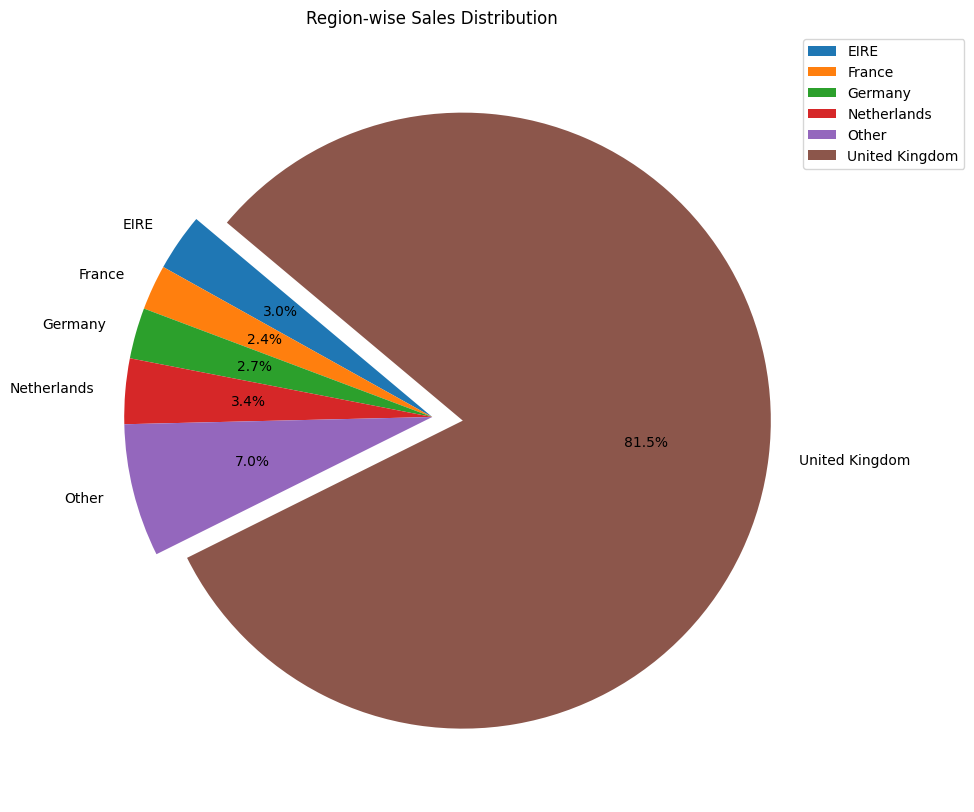

In [19]:
# Sort region sales by TotalSales
region_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).reset_index()

# Combine smaller categories into 'Other'
threshold = 0.02 * region_sales['TotalSales'].sum()  # threshold set to 2% of total sales
region_sales['Country'] = np.where(region_sales['TotalSales'] < threshold, 'Other', region_sales['Country'])
region_sales = region_sales.groupby('Country')['TotalSales'].sum().reset_index()

# Explode largest slices
explode = [0.1 if sales == region_sales['TotalSales'].max() else 0 for sales in region_sales['TotalSales']]

# Pie Chart with adjustments
plt.figure(figsize=(10, 10))
plt.pie(region_sales['TotalSales'], labels=region_sales['Country'], autopct='%1.1f%%', explode=explode, startangle=140)
plt.title('Region-wise Sales Distribution')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()




*   Dominance of the United Kingdom: The United Kingdom accounts for the largest share of sales, constituting 81.5% of the total sales. This suggests that the United Kingdom is the primary market for the business.
*   Other Regions' Contributions: The remaining regions contribute relatively smaller percentages to the overall sales. EIRE has the second-highest share at 7.0%, followed by Other (3.4%), Netherlands (2.7%), Germany (2.4%), and France (3.0%).
*   Regional Market Concentration: The high concentration of sales in the United Kingdom indicates that the business may have limited market penetration in other regions. Expanding into these regions could be a growth opportunity.




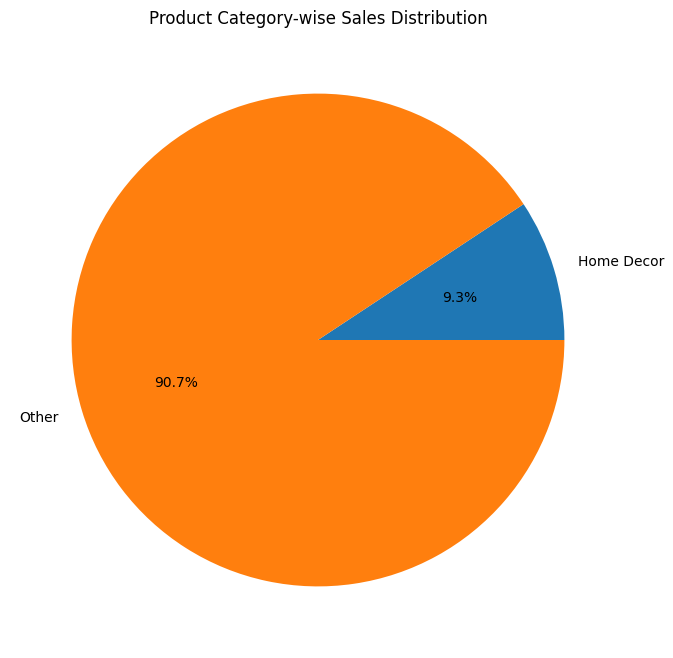

In [ ]:
# Create a new column for product categories (e.g., Home Decor, Electronics, etc.)
df['Category'] = df['Description'].apply(lambda x: 'Home Decor' if 'HEART' in x else 'Other')

# Calculate category-wise sales
category_sales = df.groupby('Category').agg({'TotalSales': 'sum'}).reset_index()

# Pie chart: Sales distribution by category
plt.figure(figsize=(8, 8))
plt.pie(category_sales['TotalSales'], labels=category_sales['Category'], autopct='%1.1f%%')
plt.title('Product Category-wise Sales Distribution')
plt.show()




*   Dominance of "Other" Category: The "Other" category accounts for the largest share of sales, constituting 90.7% of the total sales. This suggests that a diverse range of product categories contribute to the overall sales.
*   Home Decor's Contribution: The "Home Decor" category contributes a relatively smaller percentage to the overall sales, at 9.3%. While it's not the dominant category, it still represents a significant portion of the business.



**Histogram**

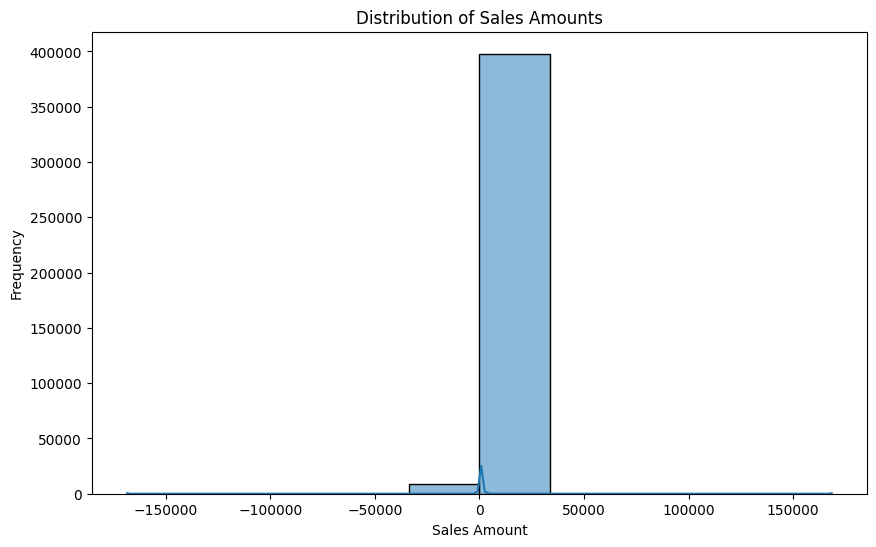

In [ ]:
# Histogram of Sales Amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalSales'], bins=10, kde=True)
plt.title('Distribution of Sales Amounts')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()




*   Right-Skewed Distribution: The distribution is heavily skewed to the right, indicating that a majority of sales transactions have relatively small amounts, while a smaller number of transactions have very large amounts.
*  Peak at Zero: The histogram shows a clear peak at zero, suggesting that a significant number of transactions have zero sales amounts. This could be due to various reasons, such as returns, cancellations, or promotional activities.
*   Negative Sales Amounts: The histogram also shows a small number of negative sales amounts. This could be due to refunds, chargebacks, or accounting errors.






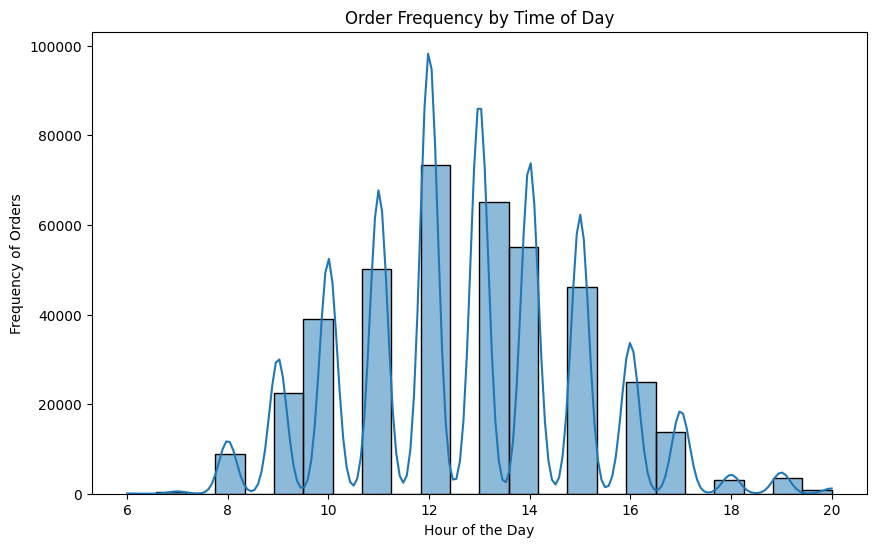

In [ ]:
# Extract the hour from the InvoiceDate
df['Hour'] = pd.to_datetime(df['InvoiceDate']).dt.hour

# Plot histogram of order frequency by hour of the day
plt.figure(figsize=(10, 6))
sns.histplot(df['Hour'], bins=24, kde=True)
plt.title('Order Frequency by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency of Orders')
plt.show()




*   Peak Order Times: The histogram shows clear peaks in order frequency around 12 PM and 14 PM (2 PM). This indicates that the busiest times for orders are during lunchtime and early afternoon.
*   Decreasing Frequency: The order frequency gradually decreases as the day progresses, with fewer orders placed in the late afternoon and evening hours.
*   Early Morning and Late Night: The order frequency is relatively low during the early morning hours (before 8 AM) and late night hours (after 8 PM).






**Timeline Chart**

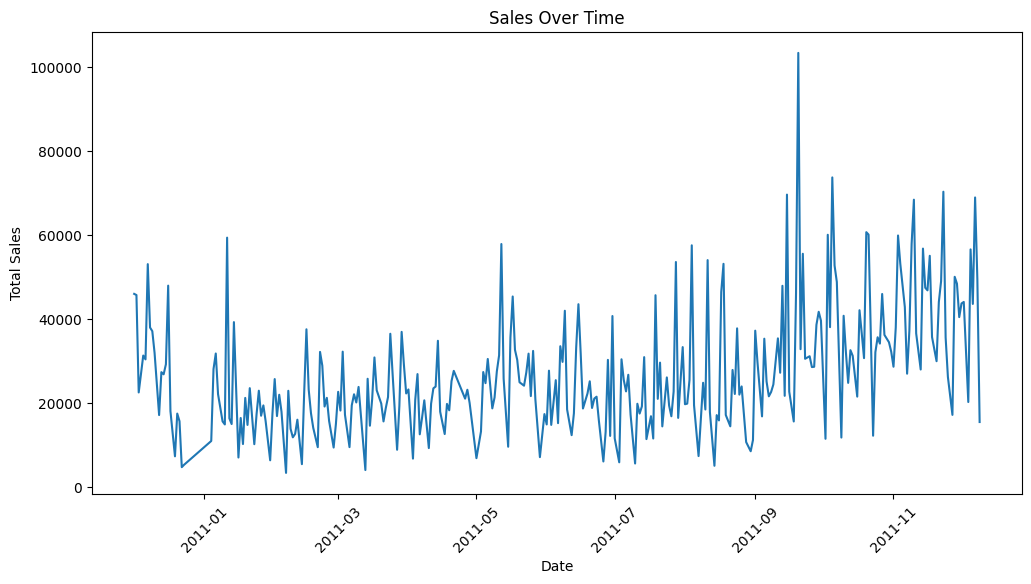

In [ ]:
# Group by date to calculate sales over time
sales_over_time = df.groupby(df['InvoiceDate'].dt.date)['TotalSales'].sum().reset_index()

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='InvoiceDate', y='TotalSales', data=sales_over_time)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()




*   Trend: The overall trend of sales appears to be somewhat volatile, with periods of growth and decline throughout the year
*   Seasonality: There seems to be a slight seasonal pattern, with higher sales observed in certain months compared to others. However, the pattern is not entirely clear.
*  Outliers: There are a few outliers with exceptionally high sales volumes. These outliers could be due to factors such as promotions, special events, or economic conditions.





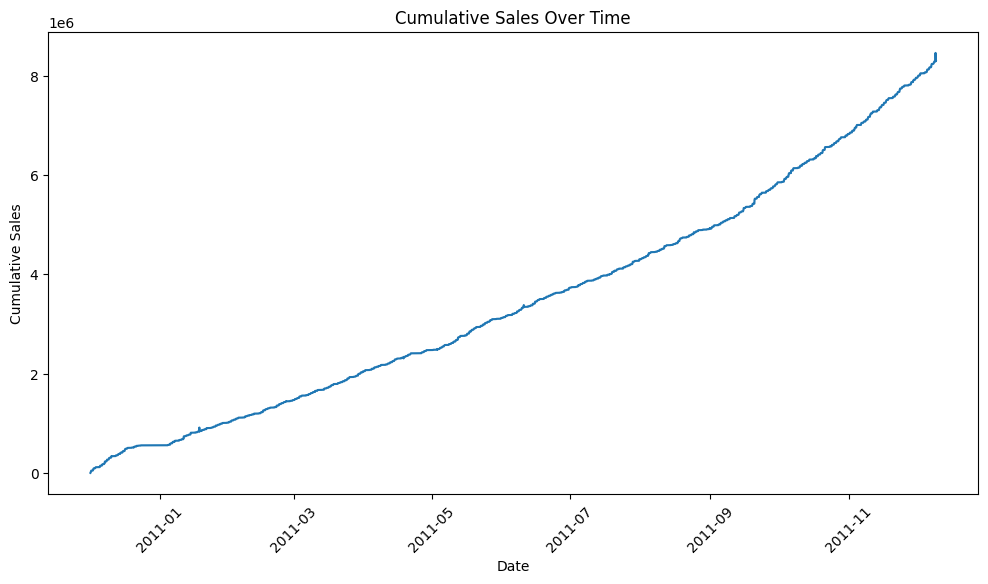

In [ ]:
# Convert InvoiceDate to datetime and sort by date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df.sort_values('InvoiceDate')

# Calculate cumulative sales
df['CumulativeSales'] = df['TotalSales'].cumsum()

# Plot cumulative sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='InvoiceDate', y='CumulativeSales', data=df)
plt.title('Cumulative Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Sales')
plt.xticks(rotation=45)
plt.show()




*   Upward Trend: The overall trend of cumulative sales is consistently upward, indicating that the business has experienced continuous growth throughout the year.
*   Steady Growth: The line chart shows a relatively steady upward slope, suggesting that the business has maintained a consistent rate of growth.
*   Acceleration: There are a few periods where the slope of the line becomes steeper, indicating periods of accelerated growth.






**Scatter Plot**

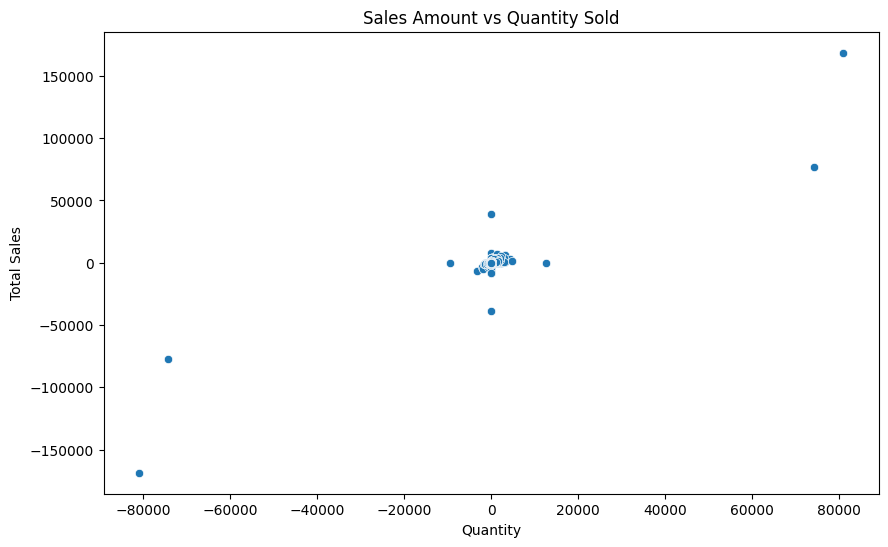

In [ ]:
# Scatter plot of Sales Amount vs Quantity Sold
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='TotalSales', data=df)
plt.title('Sales Amount vs Quantity Sold')
plt.xlabel('Quantity')
plt.ylabel('Total Sales')
plt.show()




*   Positive Correlation: There appears to be a weak positive correlation between sales amount and quantity sold. This means that as the quantity sold increases, the total sales tend to increase as well, but the relationship is not very strong.
*   Outliers: There are a few outliers, particularly in the upper right quadrant, with high values for both quantity sold and total sales. These outliers could have a significant impact on the overall correlation.
*   Clustering: The majority of data points are clustered around the center of the plot, indicating that a large number of transactions have relatively low values for both quantity sold and total sales.






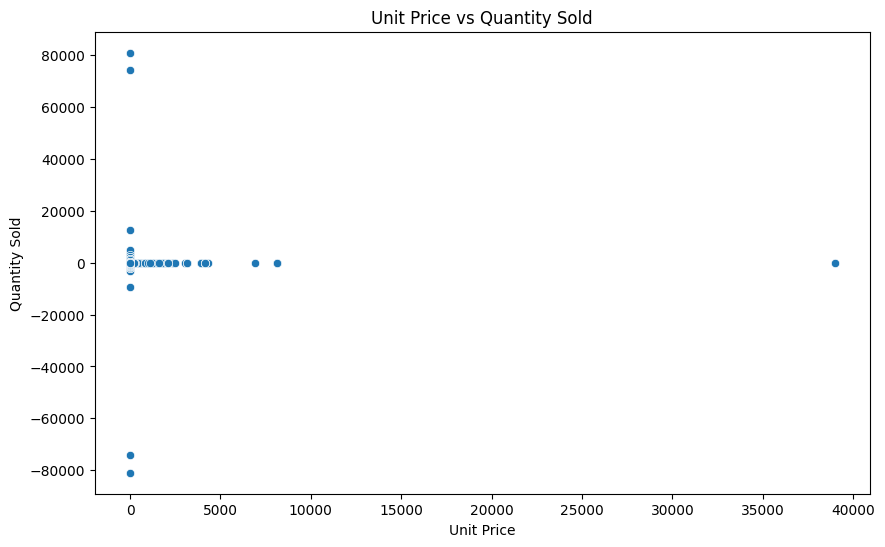

In [ ]:
# Scatter plot: Unit price vs. quantity sold
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UnitPrice', y='Quantity', data=df)
plt.title('Unit Price vs Quantity Sold')
plt.xlabel('Unit Price')
plt.ylabel('Quantity Sold')
plt.show()


**Bubble Plot**

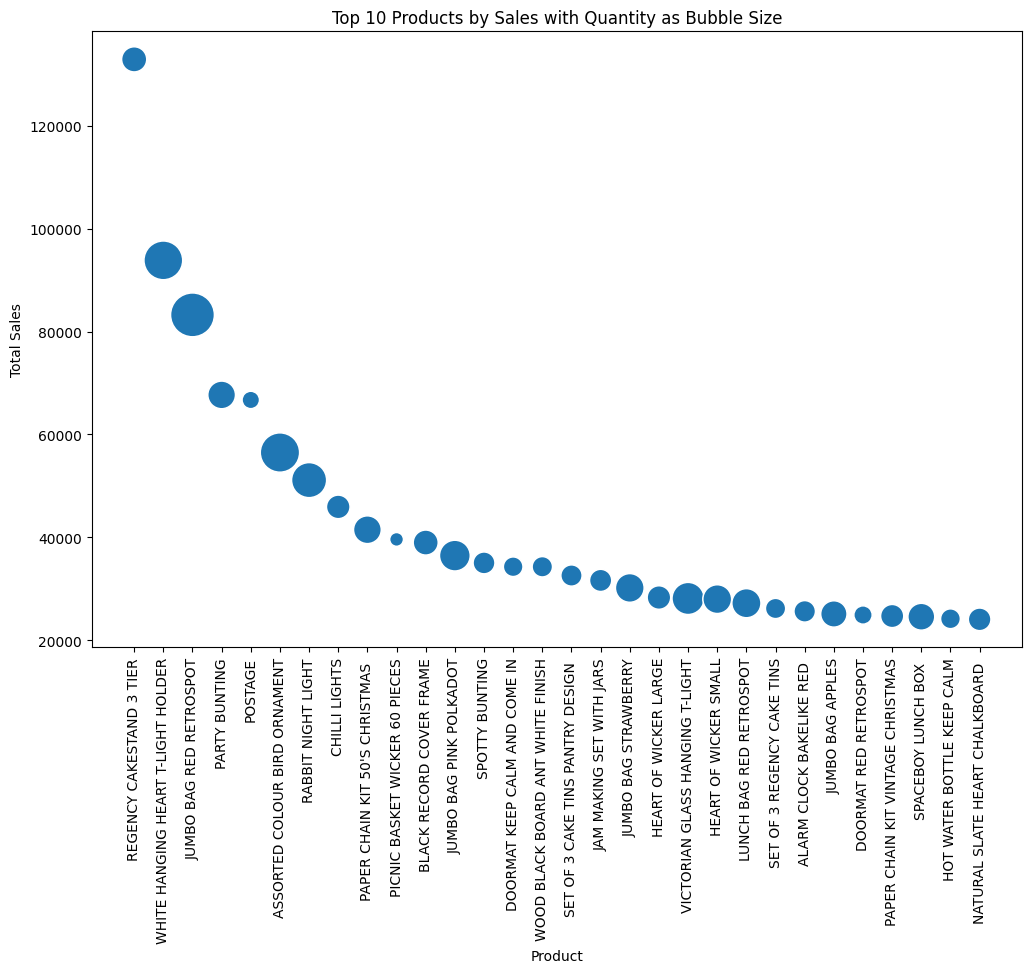

In [ ]:
# Group by 'Description' to calculate product-wise sales and total quantity
product_sales = df.groupby('Description').agg({'TotalSales': 'sum', 'Quantity': 'sum'}).reset_index()

# Sort by 'TotalSales' and select the top 10 products
top_10_product_sales = product_sales.sort_values(by='TotalSales', ascending=False).head(30)

# Bubble plot: Sales by product with quantity as bubble size for top 10 products
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Description', y='TotalSales', size='Quantity', data=top_10_product_sales, sizes=(100, 1000), legend=False)
plt.title('Top 10 Products by Sales with Quantity as Bubble Size')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()




*   Product Rankings: The product with the highest sales is "REGENCY CAKESTAND 3 TIER," followed by "WHITE HANGING HEART T-LIGHT HOLDER" and "JUMBO BAG RED RETROSPOT."
*   Sales and Quantity Relationship: The bubble size visually represents the quantity sold for each product. Larger bubbles indicate higher quantities sold. By examining the bubble sizes, we can see that the products with higher sales volumes also tend to have higher quantities sold.
*   Product Diversity: The top 10 products span various categories, including home decor, party supplies, and novelty items. This indicates that the business has a diverse product portfolio.




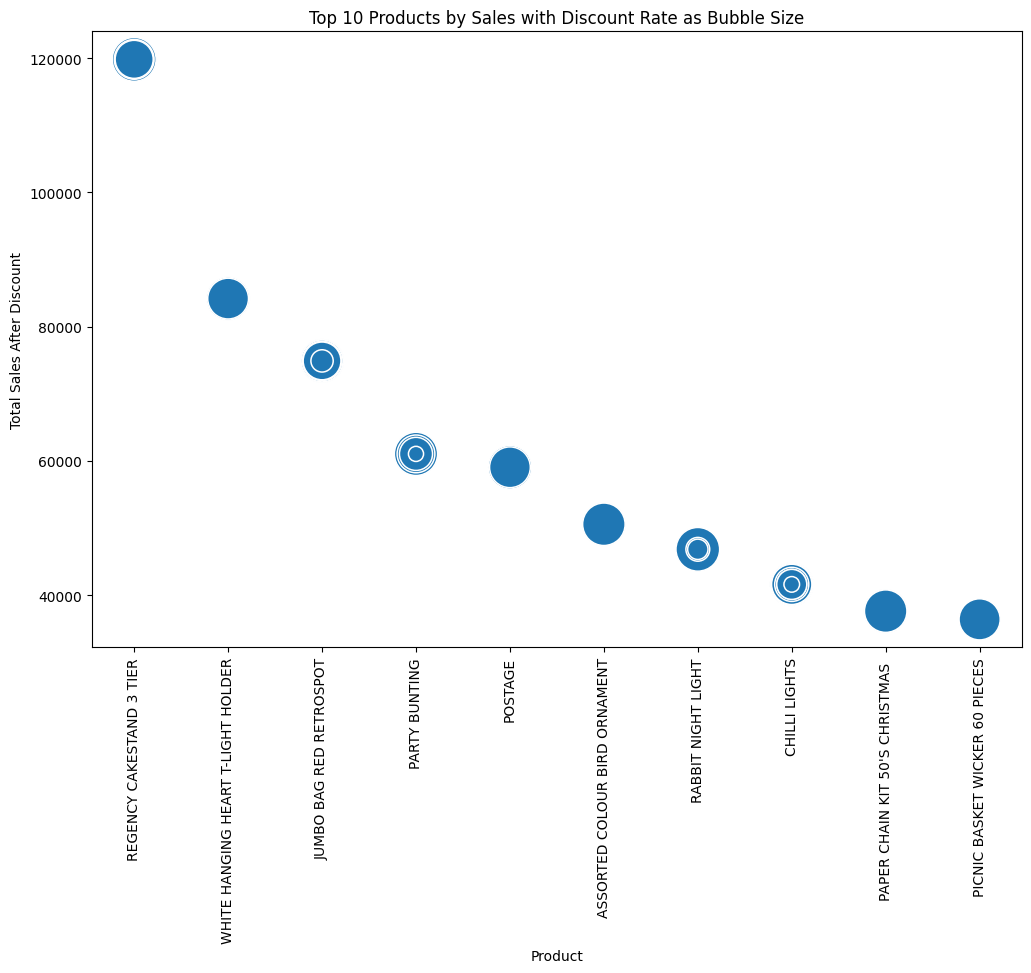

In [20]:
# Assuming a random discount rate between 0% and 20%
df['Discount'] = np.random.uniform(0, 0.2, size=len(df)) * df['UnitPrice']
df['DiscountRate'] = df['Discount'] / df['UnitPrice']

# Calculate Total Sales after discount
df['TotalSalesAfterDiscount'] = df['Quantity'] * (df['UnitPrice'] - df['Discount'])

# Top 10 products by sales
top_10_product_sales = df.groupby('Description')['TotalSalesAfterDiscount'].sum().nlargest(10).reset_index()

# Merge with original dataframe to get discount rate
top_10_product_sales = pd.merge(top_10_product_sales, df[['Description', 'DiscountRate']], on='Description')

# Bubble plot: Sales by product with discount rate as bubble size
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Description', y='TotalSalesAfterDiscount', size='DiscountRate', data=top_10_product_sales, sizes=(100, 1000), legend=False)
plt.title('Top 10 Products by Sales with Discount Rate as Bubble Size')
plt.xlabel('Product')
plt.ylabel('Total Sales After Discount')
plt.xticks(rotation=90)
plt.show()



**Conclusion:** From this experiment , i learned about basic visualizations like barplot , scatter plot , histogram and many more charts and how to implement the charts in python

